In [2]:
import pandas as pd
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dtcancer = pd.read_csv("/Machine Learning/Data/data_Breast_Cancer.csv")
#se muestra el dataframe
dtcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#permite mostrar el nombre de las columnas 
col_names=dtcancer.columns
col_names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dtcancer.columns=dtcancer.columns.str.strip()

In [27]:
#Se reemplazará el valor del diagnóstico , donde 0 corresponde Maligno y 1 a Benigno
dtcancer=dtcancer.replace(to_replace ="M", value ="0")
dtcancer=dtcancer.replace(to_replace ="B", value ="1")


In [28]:
#Se visualizan el número pruebas tanto malignas como benignas 
dtcancer['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [29]:
#Permite viusalizar información del dataframe
dtcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dtcancer.describe(),2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,3.037183e+07,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,1.250206e+08,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8.670000e+03,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,8.692180e+05,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,9.060240e+05,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8.813129e+06,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,9.113205e+08,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [31]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
inputs_X=dtcancer.drop('diagnosis', axis='columns')
# Se elimina la columna id, debido a que no es relevante
inputs_X=dtcancer.drop('id', axis='columns')
mytarget_y=dtcancer['diagnosis']

In [32]:
#Variables independientes
inputs_X.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
#Se viualiza la variable dependiente
mytarget_y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: object

In [87]:
#A continuación se introducirán los datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_X, mytarget_y, test_size = 0.2, random_state = 30)

In [88]:
#Visualiza los datos de entrenamiento y el número de variables involucradas 
X_train.shape, X_test.shape

((455, 31), (114, 31))

In [89]:
len(X_test)

114

In [90]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)


RandomForestClassifier()

In [91]:
#Visualiza el porcentaje de precisión del modelo
model.score(X_test,y_test)

1.0

In [92]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array(['0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1',
       '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1',
       '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0',
       '1', '1', '1', '1', '1', '0', '1', '1', '1', '0'], dtype=object)

In [93]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[44,  0],
       [ 0, 70]], dtype=int64)

Text(69.0, 0.5, 'Verdadero')

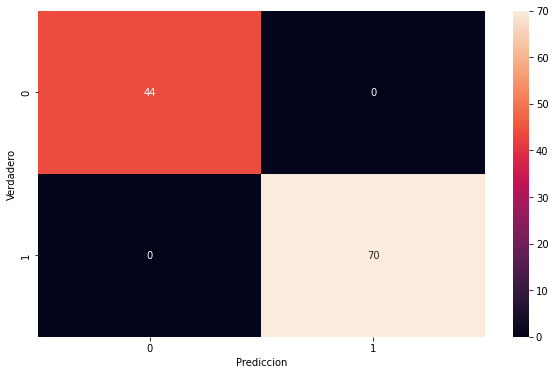

In [94]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

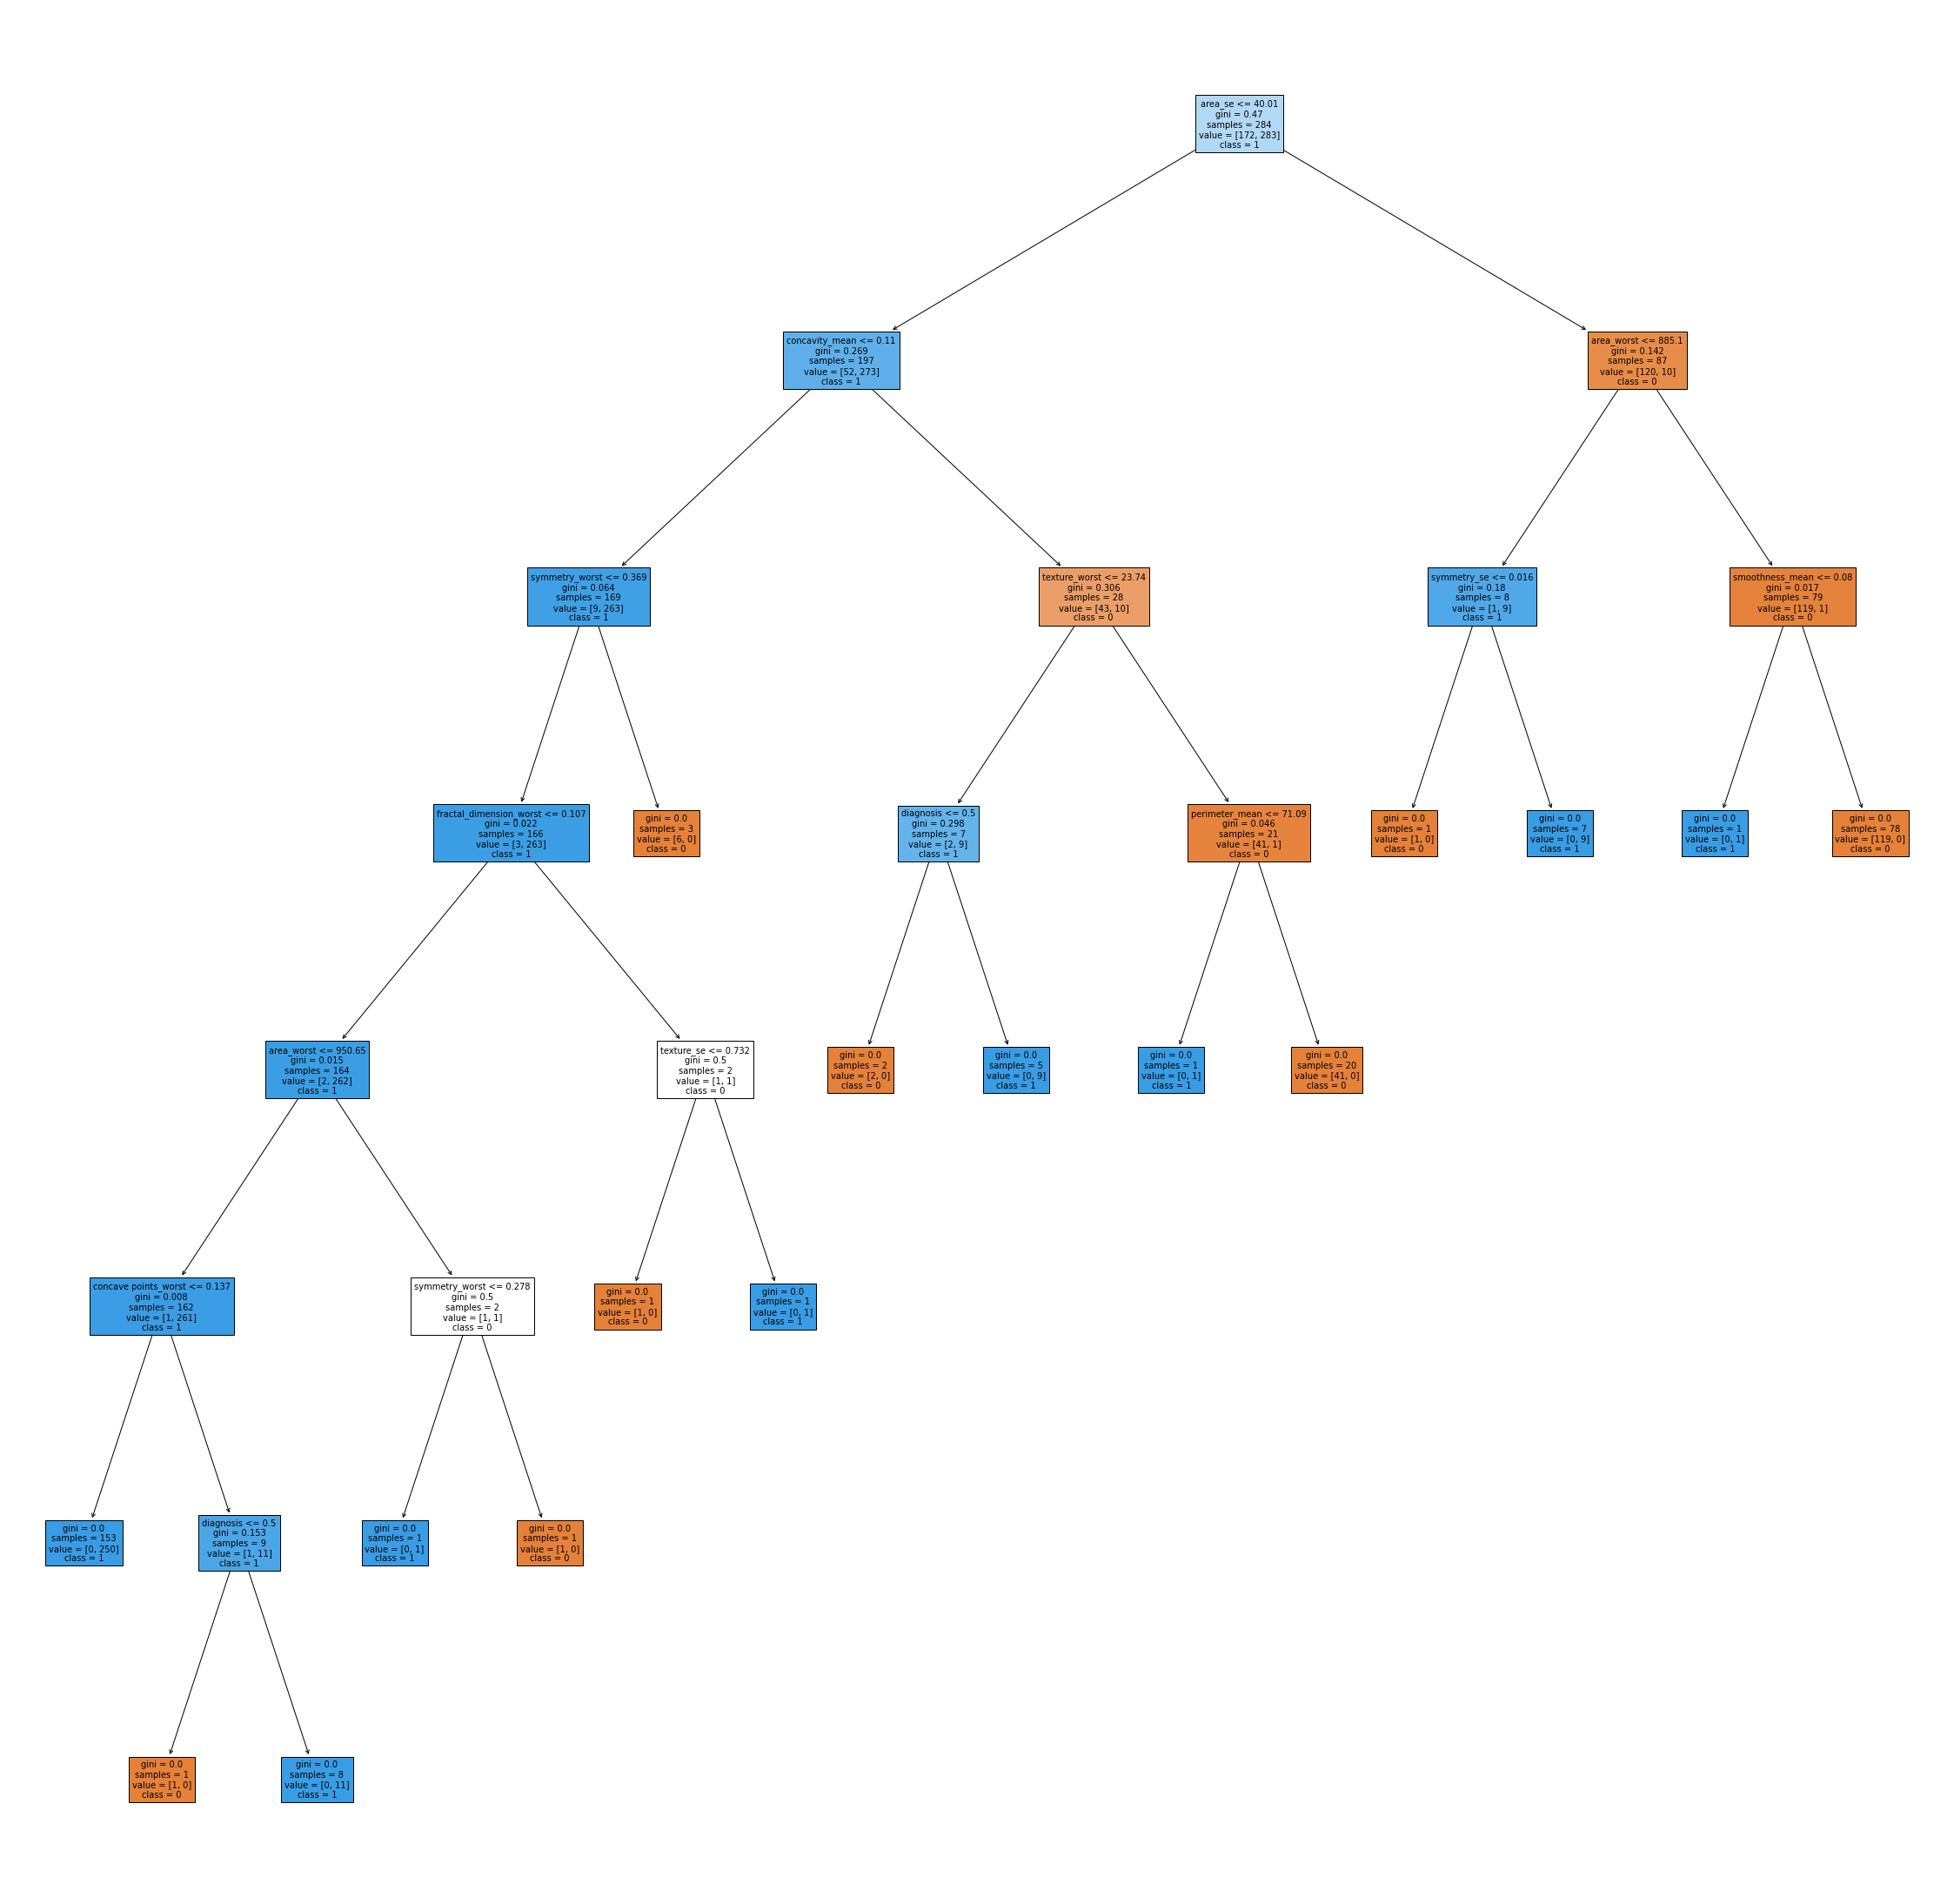

In [95]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[5], feature_names = X_train.columns,class_names=["0", "1","2"],filled=True);

In [96]:
#Trabajando ahora con SVM
#Se crean unos dataframe temporales de acuerdo a cada especie para visualizarlo en un diagrama de dispersión
df0=dtcancer[dtcancer.diagnosis=='0']
df1=dtcancer[dtcancer.diagnosis=='1']


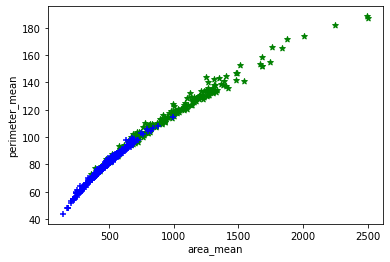

In [97]:
#Visualización del diagrama de dispersión
plt.xlabel('area_mean')
plt.ylabel('perimeter_mean')
plt.scatter(df0['area_mean'],df0['perimeter_mean'], color='green',marker='*')
plt.scatter(df1['area_mean'],df1['perimeter_mean'], color='blue',marker='+')


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [99]:
#Permite conocer cuantas variables se van a utilizar
cols=inputs_X.columns

In [100]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])


In [101]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,5.465713e-17,2.108204e-16,-2.108204e-16,-5.446193e-16,-3.630795e-16,-1.046294e-15,1.542112e-16,3.904081e-17,1.015061e-16,-5.934203e-16,...,7.710560e-16,2.967102e-16,-1.795877e-16,-1.288347e-16,-3.396550e-16,-7.808162e-17,1.737316e-16,-2.537653e-16,1.561632e-17,-6.051325e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.307032e+00,-2.075959e+00,-2.216885e+00,-2.029220e+00,-1.481562e+00,-3.182640e+00,-1.622012e+00,-1.125097e+00,-1.293998e+00,-2.771367e+00,...,-1.757242e+00,-2.210845e+00,-1.721946e+00,-1.239443e+00,-2.229713e+00,-1.381845e+00,-1.291031e+00,-1.760761e+00,-2.130344e+00,-1.580054e+00
25%,-1.307032e+00,-6.883702e-01,-7.382134e-01,-6.909171e-01,-6.657465e-01,-7.113750e-01,-7.525152e-01,-7.552345e-01,-7.523531e-01,-7.069219e-01,...,-6.711916e-01,-7.632500e-01,-6.851451e-01,-6.390924e-01,-6.969011e-01,-6.850915e-01,-7.449502e-01,-7.752907e-01,-6.687532e-01,-7.037013e-01
50%,7.650921e-01,-1.888501e-01,-1.005364e-01,-1.967033e-01,-2.765758e-01,1.644860e-02,-1.831582e-01,-3.259571e-01,-3.645564e-01,-1.073287e-01,...,-2.682848e-01,-4.026142e-02,-2.875199e-01,-3.384679e-01,-5.515807e-02,-2.482242e-01,-2.143316e-01,-2.072123e-01,-1.202569e-01,-1.961403e-01
75%,7.650921e-01,4.752350e-01,5.671760e-01,4.908069e-01,3.456016e-01,6.427828e-01,4.804769e-01,5.312101e-01,6.607418e-01,5.328523e-01,...,5.364715e-01,7.102234e-01,5.414352e-01,3.630490e-01,5.952572e-01,5.262225e-01,5.189295e-01,7.287434e-01,4.450300e-01,4.323715e-01
max,7.650921e-01,4.078188e+00,4.615039e+00,4.078184e+00,5.393448e+00,3.332250e+00,4.543800e+00,4.253801e+00,3.678910e+00,4.534445e+00,...,4.188013e+00,3.472784e+00,4.374973e+00,6.071859e+00,3.899367e+00,4.970603e+00,4.575058e+00,2.693255e+00,5.981964e+00,6.652155e+00


In [102]:
# Se importa el clasificador SVC
from sklearn.svm import SVC


# Se importan las metricas para calcular la precisión
from sklearn.metrics import accuracy_score


#Se instancia el clasificador con hypermarametros por defecto
svc=SVC() 


#Al clasificador se fijan los datos de entrenamiento
svc.fit(X_train,y_train)


# Se hacen las predicciones sobre los datos de prueba
y_pred=svc.predict(X_test)


# compute and print accuracy score
# Se visualiza el computo y la precisión del puntaje
print('Puntuación de precisión del modelo con hiperparámetros predeterminados: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con hiperparámetros predeterminados: 1.0000


In [103]:
# instanciación con clasificador con kernel rbf y C=100
svc=SVC(C=100.0) 

# Se se establece los datos de entrenamiento
svc.fit(X_train,y_train)

# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=svc.predict(X_test)

# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel rbf y C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con kernel rbf y C=100.0 : 1.0000


In [72]:
# se instancia un clasificador con kernel lineal y C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# Se se establece los datos de entrenamiento
linear_svc.fit(X_train,y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred_test=linear_svc.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel lineal y C=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Puntuación de precisión del modelo con kernel lineal y C=1.0: 1.0000


In [73]:
#Se visuarlizarán los datos de entrenamiento
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array(['0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1',
       '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0',
       '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0',
       '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1',
       '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0

In [104]:
# Ahora lo haremos con logistica de regresión
#Se define el modelo de logística de regresión 
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

LogisticRegression()

In [105]:
modelreg.score(X_test,y_test)

1.0

In [108]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [111]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [112]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

1.0

In [114]:
get_score(SVC(),X_train,X_test,y_train,y_test)

1.0

In [115]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

1.0

In [225]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [228]:
lg_score = []
svm_score = []
rf_score = []
for train_index,test_index in kf.split(inputs_X):
    X_train,X_test=inputs_X.iloc[train_index,:],inputs_X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=mytarget_y[train_index],mytarget_y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=40),X_train,X_test,y_train,y_test))
    

In [229]:
lg_score

[0.5105263157894737, 0.37894736842105264, 0.2275132275132275]

In [216]:
svm_score

[0.8157894736842105, 0.9315789473684211, 0.9365079365079365]

In [217]:
rf_score

[0.9842105263157894, 1.0, 1.0]

In [224]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [230]:
cross_val_score(LogisticRegression(),X_scaled,y_train)

array([1.        , 1.        , 1.        , 1.        , 0.98684211])

In [231]:
cross_val_score(SVC(),X_train,y_train)

array([0.92105263, 0.82894737, 0.89473684, 0.94736842, 0.92105263])

In [237]:
cross_val_score(RandomForestClassifier(n_estimators=70),X_train,y_train)

array([1.        , 1.        , 1.        , 1.        , 0.98684211])